# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [4]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

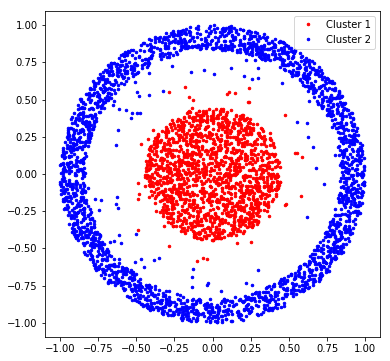

In [91]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 15
threshold = 1
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

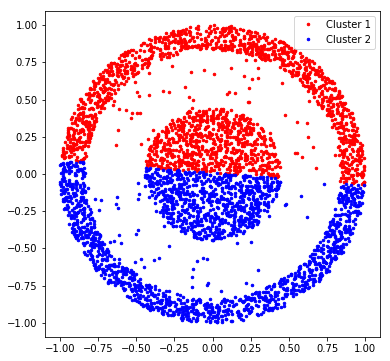

In [26]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [5]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [28]:
# preprocess
# begin answer

# useless
'''
feature_mean = np.mean(fea, axis = 1)
c = fea.copy()
c.data **= 2
feature2_mean = np.mean(c, axis = 1)
feature_std = feature2_mean - np.power(feature_mean, 2)
#feature_std = np.std(fea, axis = 1) + 1e-50
#print(feature_std)

fea_norm = ((fea - feature_mean)/feature_std)
'''

# map to [0, 1]
fea_max = np.max(fea, axis=0)

fea_norm = fea.todense()/(fea_max.todense())


1.0

In [31]:
import scipy
fea_norm = scipy.sparse.csr_matrix(fea_norm)

In [36]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
from spectral import spectral
from kmeans import kmeans
# YOUR CODE HERE
# begin answer

iters = 10

# acuracy
avg_acc_spc = 0
avg_acc_kms = 0

# mutual information
avg_mi_spc = 0
avg_mi_kms = 0

for _ in range(iters):
    W = constructW(fea)
    W = np.array(W.todense())
    idx_spc = spectral(W, 5)
    idx_kms = kmeans(W, 5)
    
    maped_gnd_spc = bestMap(idx_spc, gnd)
    maped_gnd_kms = bestMap(idx_kms, gnd)
    
    acc_spc = (idx_spc == maped_gnd_spc).sum()/(idx_spc.shape[0])
    acc_kms = (idx_kms == maped_gnd_kms).sum()/(idx_kms.shape[0])
    
    mi_spc = MutualInfo(maped_gnd_spc, idx_spc)
    mi_kms = MutualInfo(maped_gnd_kms, idx_kms)
    
    #print(acc_spc, acc_kms, mi_spc, mi_kms)
    
    avg_acc_spc += acc_spc/iters
    avg_acc_kms += acc_kms/iters
    
    avg_mi_spc += mi_spc/iters
    avg_mi_kms += mi_kms/iters


print("Accuracy of Spectral: ", avg_acc_spc, "Mutual Information: ", avg_mi_spc)
print("Accuracy of K-means: ", avg_acc_kms, "Mutual Information: ", avg_mi_kms)
    
# end answer

Accuracy of Spectral:  0.7260045489006822 Mutual Information:  0.4593304705430653
Accuracy of K-means:  0.5320697498104625 Mutual Information:  0.12233579952594373


In [32]:
# With normalization to [0, 1]  (divide by max)

from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
from spectral import spectral
from kmeans import kmeans
# YOUR CODE HERE
# begin answer

iters = 10

# acuracy
avg_acc_spc = 0
avg_acc_kms = 0

# mutual information
avg_mi_spc = 0
avg_mi_kms = 0

for _ in range(iters):
    W = constructW(fea_norm)
    W = np.array(W.todense())
    idx_spc = spectral(W, 5)
    idx_kms = kmeans(W, 5)
    
    maped_gnd_spc = bestMap(idx_spc, gnd)
    maped_gnd_kms = bestMap(idx_kms, gnd)
    
    acc_spc = (idx_spc == maped_gnd_spc).sum()/(idx_spc.shape[0])
    acc_kms = (idx_kms == maped_gnd_kms).sum()/(idx_kms.shape[0])
    
    mi_spc = MutualInfo(maped_gnd_spc, idx_spc)
    mi_kms = MutualInfo(maped_gnd_kms, idx_kms)
    
    print(acc_spc, acc_kms, mi_spc, mi_kms)
    
    avg_acc_spc += acc_spc/iters
    avg_acc_kms += acc_kms/iters
    
    avg_mi_spc += mi_spc/iters
    avg_mi_kms += mi_kms/iters


print("Accuracy of Spectral: ", avg_acc_spc, "Mutual Infomation: ", avg_mi_spc)
print("Accuracy of K-means: ", avg_acc_kms, "Mutual Infomation: ", avg_mi_kms)
    
# end answer

0.5959059893858984 0.33813495072024263 0.037651472497933415 0.04921562885406401
0.5936315390447309 0.3889310083396513 0.038239322095253 0.06569149505634561
0.5974222896133434 0.3912054586808188 0.035704080305246834 0.05893568319482805
0.5936315390447309 0.3411675511751327 0.038239322095253 0.07852637075329776
0.6027293404094011 0.3601213040181956 0.03212294692436753 0.05236595271144976
0.6004548900682335 0.510235026535254 0.033658508663690745 0.12925839835981973
0.5989385898407885 0.41243366186504926 0.035994113198276535 0.0731090531740116
0.5959059893858984 0.4723275208491281 0.03794567183784272 0.08533894780455045
0.5959059893858984 0.4746019711902957 0.03776133878030238 0.04897230017471918
0.599696739954511 0.35178165276724793 0.03537964671990799 0.06520181255488174
Accuracy of Spectral:  0.5974222896133434 Mutual Infomation:  0.03626964231180742
Accuracy of K-means:  0.40409401061410155 Mutual Infomation:  0.07066156426379679


In [112]:
(idx == maped_gnd).sum()/(idx.shape[0])

0.7407126611068992